In [30]:
# import json

# with open('all_qguide_data.html', 'r') as file:
#     json_data = json.load(file)

# with open('all_qguide_data.json', 'w') as file:
#     json.dump(json_data, file, separators=(',', ':'))


In [ ]:
# from bs4 import BeautifulSoup
# import pandas as pd
# import requests
# from tabulate import tabulate

# def extract_table_data(url):
#     # Fetch the HTML content from the URL
#     response = requests.get(url)
#     html = response.text

#     # Parse the HTML
#     soup = BeautifulSoup(html, 'html.parser')

#     # Define table names
#     table_names = ['Responses', 'General', 'Instructor', 'Hours', 'Recommendation', 'Recommendation_stats', 'Reasons', 'Comments']

#     # Find all tables containing the required data
#     tables = soup.find_all('table')

#     # Create a dictionary to store DataFrames for each table
#     dataframes = {}

#     # Iterate through each table
#     for idx, table in enumerate(tables):
#         # Extract headers
#         headers = []
#         for th in table.find('tr').find_all('th'):
#             headers.append(th.text.strip())

#         # Extract data rows
#         data = []
#         for row in table.find_all('tr'):
#             row_data = [cell.text.strip() for cell in row.find_all(['td', 'th'])]
#             if len(row_data) == len(headers):
#                 data.append(row_data)

#         # If data rows exist
#         if len(data) > 1:
#             # Create a DataFrame excluding the header row
#             df = pd.DataFrame(data[1:], columns=headers)
#             dataframes[table_names[idx]] = df

#     return dataframes


In [ ]:
# Example usage:
url = "https://harvard.bluera.com/harvard/rpv-eng.aspx?lang=eng&redi=1&SelectedIDforPrint=7a0a2af3e410e112bf9de805337d95874c27341b5445e2f5053d952af958c58c9549a839ccebc274f7760f73d58e1223&ReportType=2&regl=en-US"
tables_data = extract_table_data(url)

# Print each table with its name
for table_name, table_df in tables_data.items():
    print(f"Table '{table_name}':")
    print(tabulate(table_df, headers='keys', tablefmt='grid'))
    print()

Table 'Responses':
+----+----------------+------------+
|    | Raters         | Students   |
+====+================+============+
|  0 | Responded      | 18         |
+----+----------------+------------+
|  1 | Invited        | 24         |
+----+----------------+------------+
|  2 | Response Ratio | 75%        |
+----+----------------+------------+

Table 'General':
+----+--------------------------------------------------------------------------------------------+---------+-------------+-------------+--------+--------+------------------+---------------+------------+
|    |                                                                                            |   Count | Excellent   | Very Good   | Good   | Fair   | Unsatisfactory   |   Course Mean |   FAS Mean |
+====+============================================================================================+=========+=============+=============+========+========+==================+===============+============+
|  0 | Evaluate th

In [ ]:
# import json
# import time

# with open('all_qguide_data.json', 'r') as f:
#     all_qguide_data = json.load(f)

# course_data_list = []

# start_time = time.time()

# total_entries = len(all_qguide_data['data'])

# processed_entries = 0

# for entry in all_qguide_data['data']:
#     iteration_start_time = time.time()

#     course_data = {}
#     for key in ['title', 'url', 'instructor', 'department', 'term', 'subject', 'blueCourseId']:
#         course_data[key.capitalize()] = entry[key]

#     tables_data = extract_table_data(entry['url'])

#     tables_data_dict = {table_name: table_df.to_dict(orient='records') for table_name, table_df in tables_data.items()}

#     course_data['Feedback'] = tables_data_dict

#     course_data_list.append(course_data)

#     processed_entries += 1

#     iteration_elapsed_time = time.time() - iteration_start_time

#     percent_finished = (processed_entries / total_entries) * 100

#     avg_time_per_iteration = (time.time() - start_time) / processed_entries

#     remaining_entries = total_entries - processed_entries
#     remaining_time_seconds = remaining_entries * avg_time_per_iteration

#     hours = int(remaining_time_seconds // 3600)
#     remaining_time_seconds %= 3600
#     minutes = int(remaining_time_seconds // 60)
#     seconds = int(remaining_time_seconds % 60)

#     print(f"Iteration {processed_entries}/{total_entries} - {percent_finished:.2f}% completed - Time taken: {iteration_elapsed_time:.2f}s - Estimated time remaining: {hours}h {minutes}m {seconds}s")

# end_time = time.time()

# with open('course_data.json', 'w') as json_file:
#     json.dump(course_data_list, json_file, indent=4)


Iteration 1/11961 - 0.01% completed - Time taken: 0.33s - Estimated time remaining: 1h 4m 55s
Iteration 2/11961 - 0.02% completed - Time taken: 0.15s - Estimated time remaining: 0h 47m 34s
Iteration 3/11961 - 0.03% completed - Time taken: 0.16s - Estimated time remaining: 0h 42m 28s
Iteration 4/11961 - 0.03% completed - Time taken: 0.16s - Estimated time remaining: 0h 39m 37s
Iteration 5/11961 - 0.04% completed - Time taken: 0.17s - Estimated time remaining: 0h 38m 33s
Iteration 6/11961 - 0.05% completed - Time taken: 0.16s - Estimated time remaining: 0h 37m 26s
Iteration 7/11961 - 0.06% completed - Time taken: 0.16s - Estimated time remaining: 0h 36m 31s
Iteration 8/11961 - 0.07% completed - Time taken: 0.18s - Estimated time remaining: 0h 36m 20s
Iteration 9/11961 - 0.08% completed - Time taken: 0.17s - Estimated time remaining: 0h 35m 58s
Iteration 10/11961 - 0.08% completed - Time taken: 0.18s - Estimated time remaining: 0h 35m 54s
Iteration 11/11961 - 0.09% completed - Time taken:

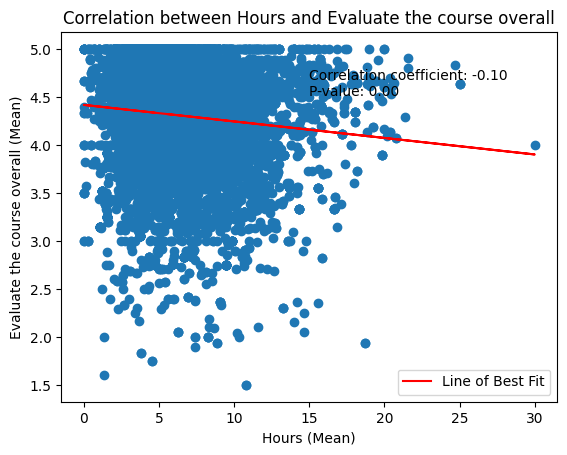

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Load the JSON data
with open('course_data.json', 'r') as file:
    data = json.load(file)

# Initialize lists to store hours and overall evaluation ratings
hours = []
course_scores = []

# Iterate through each entry in the data
for entry in data:
    # Check if the entry has a 'Feedback' dictionary with 'Hours' and 'General' keys
    if 'Feedback' in entry and 'Hours' in entry['Feedback'] and 'General' in entry['Feedback']:
        # Extract hours and overall evaluation rating
        hours_data = entry['Feedback']['Hours']
        overall_data = entry['Feedback']['General'][0]

        # Check if hours_data has at least three elements and the third element is a dictionary with a 'Value' key
        if len(hours_data) > 2 and isinstance(hours_data[2], dict) and 'Value' in hours_data[2]:
            # Convert hours value to float and append to the list
            hours.append(float(hours_data[2]['Value']))
        else:
            # Handle missing or invalid hours data
            hours.append(np.nan)

        # Convert overall evaluation rating to float and append to the list
        course_scores.append(float(overall_data['Course Mean']))
    else:
        # Handle missing 'Feedback', 'Hours', or 'General' keys
        hours.append(np.nan)
        course_scores.append(np.nan)

# Convert lists to numpy arrays for correlation calculation
hours_array = np.array(hours)
course_scores_array = np.array(course_scores)

# Remove NaN values from the arrays
valid_indices = ~np.isnan(hours_array) & ~np.isnan(course_scores_array)
hours_array = hours_array[valid_indices]
course_scores_array = course_scores_array[valid_indices]

# Calculate the correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(hours_array, course_scores_array)

# Fit a linear regression line
slope, intercept = np.polyfit(hours_array, course_scores_array, 1)
line_of_best_fit = slope * hours_array + intercept

# Plot the data
plt.scatter(hours_array, course_scores_array)
plt.plot(hours_array, line_of_best_fit, color='red', label='Line of Best Fit')
plt.xlabel('Hours (Mean)')
plt.ylabel('Evaluate the course overall (Mean)')
plt.title('Correlation between Hours and Evaluate the course overall')
plt.text(0.5, 0.9, f'Correlation coefficient: {correlation_coefficient:.2f}\nP-value: {p_value:.2f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')
plt.legend()
plt.show()

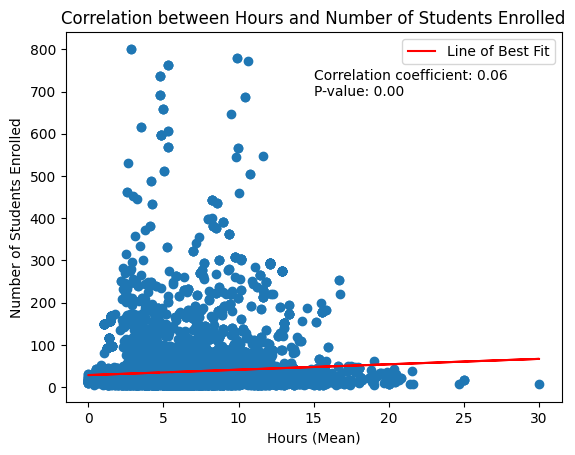

In [132]:
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Load the JSON data
with open('course_data.json', 'r') as file:
    data = json.load(file)

# Initialize lists to store hours and overall evaluation ratings
hours = []
course_scores = []

# Iterate through each entry in the data
for entry in data:
    # Check if the entry has a 'Feedback' dictionary with 'Hours' and 'Responses' keys
    if 'Feedback' in entry and 'Hours' in entry['Feedback'] and 'Responses' in entry['Feedback']:
        # Extract hours and overall evaluation rating
        hours_data = entry['Feedback']['Hours']
        responses = entry['Feedback']['Responses']

        # Check if 'Responses' list has at least two elements
        if len(responses) > 1:
            # Check if hours_data has at least three elements and the third element is a dictionary with a 'Value' key
            if len(hours_data) > 2 and isinstance(hours_data[2], dict) and 'Value' in hours_data[2]:
                # Convert hours value to float and append to the list
                hours.append(float(hours_data[2]['Value']))

                # Convert overall evaluation rating to float and append to the list
                course_scores.append(float(responses[1]['Students']))
            else:
                # Handle missing or invalid hours data
                hours.append(np.nan)
                course_scores.append(np.nan)
        else:
            # Handle missing or invalid 'Responses' data
            hours.append(np.nan)
            course_scores.append(np.nan)
    else:
        # Handle missing 'Feedback', 'Hours', or 'Responses' keys
        hours.append(np.nan)
        course_scores.append(np.nan)

# Convert lists to numpy arrays for correlation calculation
hours_array = np.array(hours)
course_scores_array = np.array(course_scores)

# Remove NaN values from the arrays
valid_indices = ~np.isnan(hours_array) & ~np.isnan(course_scores_array)
hours_array = hours_array[valid_indices]
course_scores_array = course_scores_array[valid_indices]

# Calculate the correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(hours_array, course_scores_array)

# Fit a linear regression line
slope, intercept = np.polyfit(hours_array, course_scores_array, 1)
line_of_best_fit = slope * hours_array + intercept

# Plot the data
plt.scatter(hours_array, course_scores_array)
plt.plot(hours_array, line_of_best_fit, color='red', label='Line of Best Fit')
plt.xlabel('Hours (Mean)')
plt.ylabel('Number of Students Enrolled')
plt.title('Correlation between Hours and Number of Students Enrolled')
plt.text(0.5, 0.9, f'Correlation coefficient: {correlation_coefficient:.2f}\nP-value: {p_value:.2f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')
plt.legend()
plt.show()

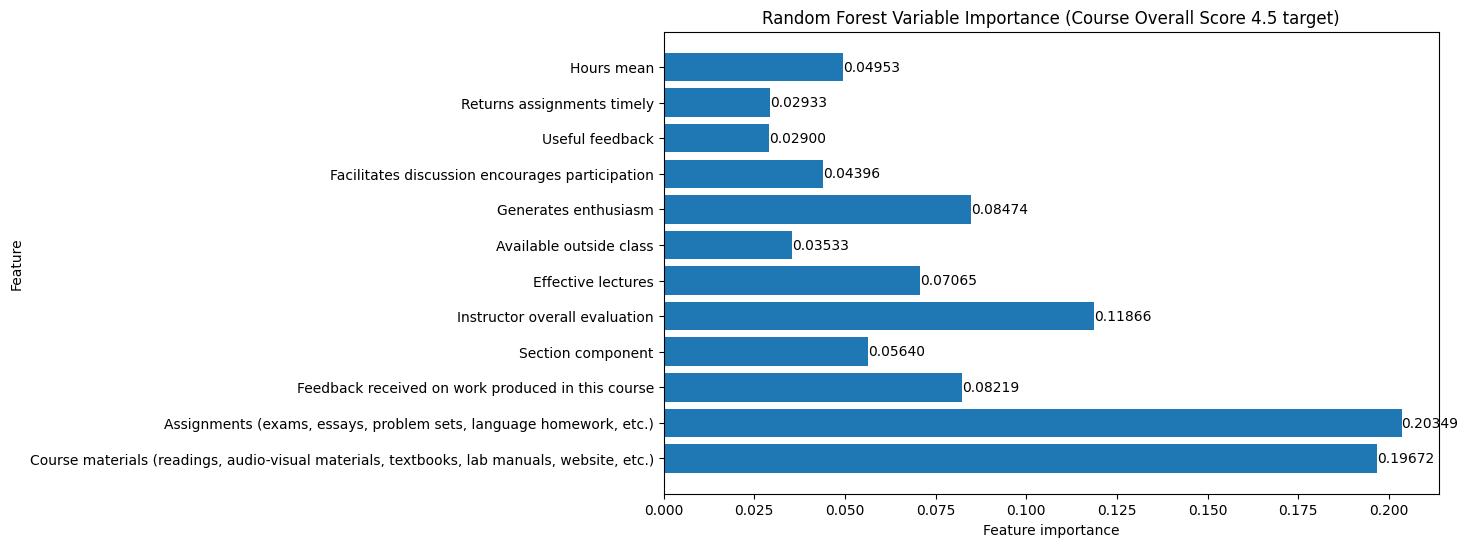

In [121]:
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load the JSON data
with open('course_data.json', 'r') as file:
    data = json.load(file)

# Extract relevant features and target variable
features = []
target = []

for entry in data:
    if 'Feedback' in entry and 'General' in entry['Feedback']:  # Check if 'Feedback' and 'General' exist
        for feedback in entry['Feedback']['General']:
            if feedback.get('') == "Evaluate the course overall.":
                course_mean = float(feedback['Course Mean'])

                feature_values = []

                course_eval = entry['Feedback']['General']

                for course_key in range(1, 5):
                    if course_key < len(course_eval):
                        course_means = course_eval[course_key].get('Course Mean')
                        if instructor_mean is not None:
                            try:
                                feature_values.append(float(course_means))
                            except ValueError:
                                feature_values.append(np.nan)  # Append NaN for invalid values
                        else:
                            feature_values.append(np.nan)
                    else:
                        feature_values.append(np.nan)  # Append NaN if instructor key doesn't exist

                instructors = entry['Feedback']['Instructor']
                
                for instructor_key in range(7):
                    if instructor_key < len(instructors):
                        instructor_mean = instructors[instructor_key].get('Instructor Mean')
                        if instructor_mean is not None:
                            try:
                                feature_values.append(float(instructor_mean))
                            except ValueError:
                                feature_values.append(np.nan)  # Append NaN for invalid values
                        else:
                            feature_values.append(np.nan)
                    else:
                        feature_values.append(np.nan)  # Append NaN if instructor key doesn't exist
                
                hours = entry['Feedback'].get('Hours', [])
                if len(hours) > 2 and 'Value' in hours[2]:
                    try:
                        feature_values.append(float(hours[2]['Value']))
                    except ValueError:
                        feature_values.append(np.nan)  # Append NaN for invalid values
                else:
                    feature_values.append(np.nan)  # Append NaN if 'Value' key doesn't exist or 'Hours' list is too short
                
                features.append(feature_values)
                # Classify course mean into 'good' (1) or 'not good' (0)
                target.append(1 if course_mean >= 4.5 else 0)

# Convert lists to numpy arrays
X = np.array(features)
y = np.array(target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1010101)

# Train a random forest classifier
clf = RandomForestClassifier(random_state=1010101)
clf.fit(X_train, y_train)

# Plot feature importances
plt.figure(figsize=(10, 6))
n_features = X.shape[1]
bars = plt.barh(range(n_features), clf.feature_importances_, align='center')
plt.yticks(np.arange(n_features), ['Course materials (readings, audio-visual materials, textbooks, lab manuals, website, etc.)',
                                   'Assignments (exams, essays, problem sets, language homework, etc.)',
                                   'Feedback received on work produced in this course',
                                   'Section component',
                                   'Instructor overall evaluation',
                                   'Effective lectures',
                                   'Available outside class',
                                   'Generates enthusiasm',
                                   'Facilitates discussion encourages participation',
                                   'Useful feedback',
                                   'Returns assignments timely',
                                   'Hours mean',]
                                   [:n_features])
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.title('Random Forest Variable Importance (Course Overall Score 4.5 target)')

# Add text annotations
for bar, importance in zip(bars, clf.feature_importances_):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{importance:.5f}', va='center')

plt.show()


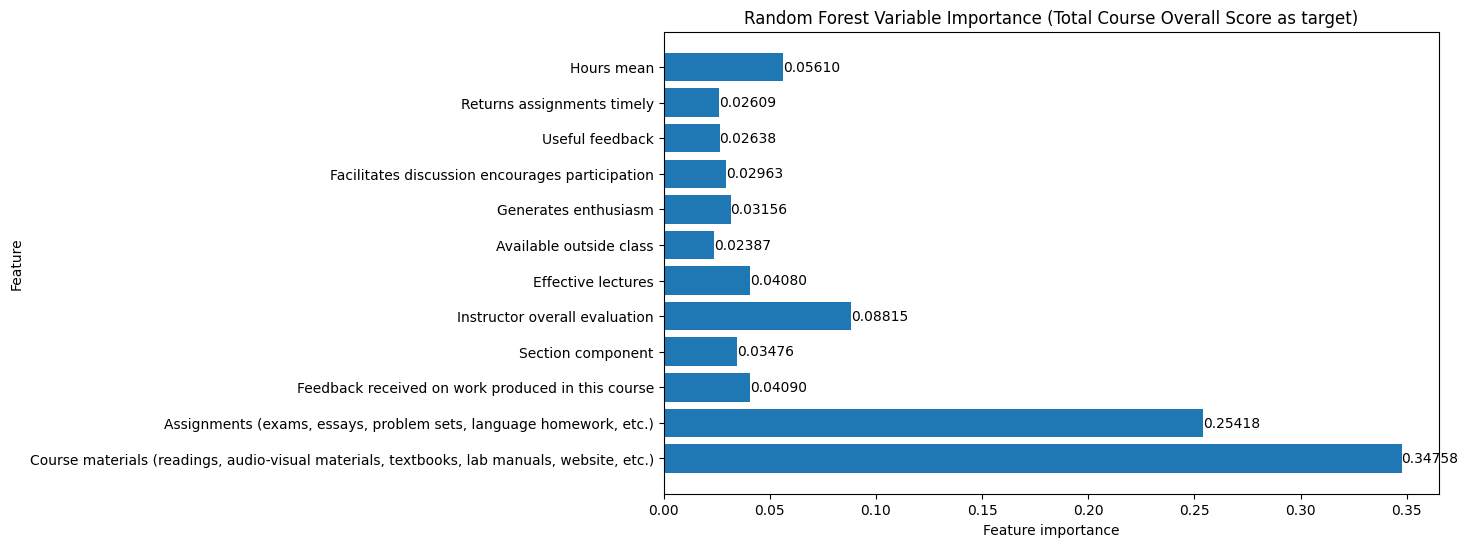

In [122]:
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 

# Train a random forest regressor
regressor = RandomForestRegressor(random_state=3)
regressor.fit(X_train, y_train)

# Plot feature importances
plt.figure(figsize=(10, 6))
n_features = X.shape[1]
bars = plt.barh(range(n_features), regressor.feature_importances_, align='center')
plt.yticks(np.arange(n_features), ['Course materials (readings, audio-visual materials, textbooks, lab manuals, website, etc.)',
                                   'Assignments (exams, essays, problem sets, language homework, etc.)',
                                   'Feedback received on work produced in this course',
                                   'Section component',
                                   'Instructor overall evaluation',
                                   'Effective lectures',
                                   'Available outside class',
                                   'Generates enthusiasm',
                                   'Facilitates discussion encourages participation',
                                   'Useful feedback',
                                   'Returns assignments timely',
                                   'Hours mean',]
                                   [:n_features])
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.title('Random Forest Variable Importance (Total Course Overall Score as target)')

# Add text annotations
for bar, importance in zip(bars, regressor.feature_importances_):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{importance:.5f}', va='center')

plt.show()


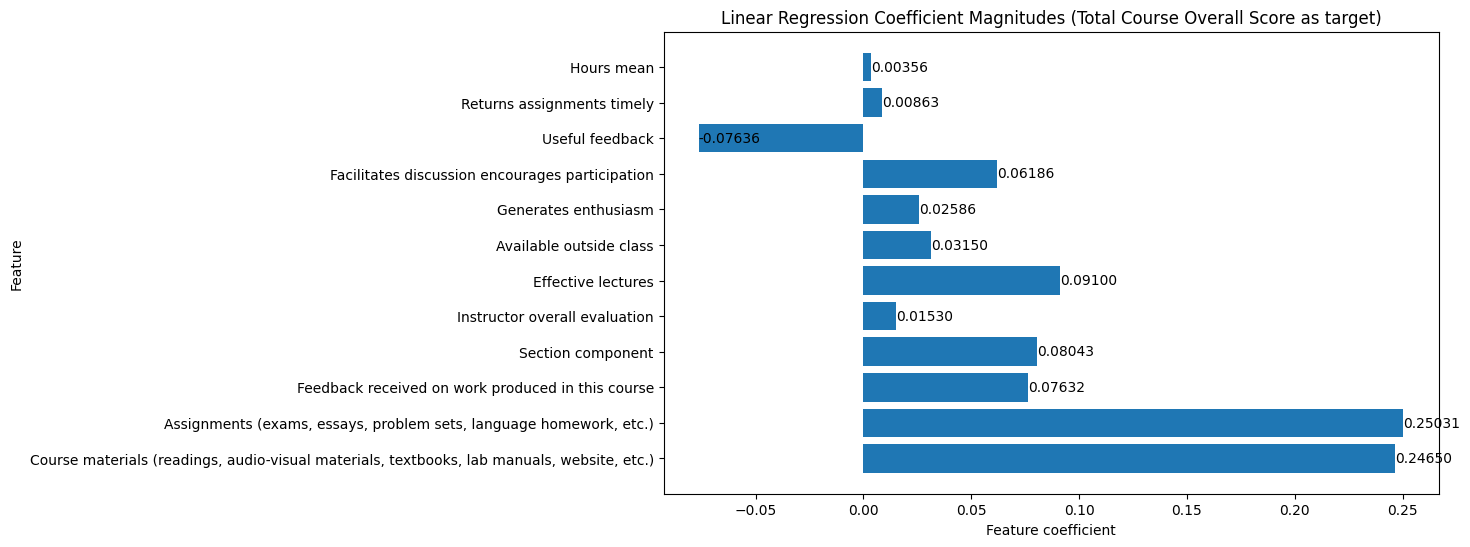

In [126]:
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.impute import SimpleImputer

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=123123123)

# Initialize and train the linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Plot feature coefficients
plt.figure(figsize=(10, 6))
n_features = X.shape[1]
bars = plt.barh(range(n_features), regressor.coef_, align='center')
plt.yticks(np.arange(n_features), ['Course materials (readings, audio-visual materials, textbooks, lab manuals, website, etc.)',
                                   'Assignments (exams, essays, problem sets, language homework, etc.)',
                                   'Feedback received on work produced in this course',
                                   'Section component',
                                   'Instructor overall evaluation',
                                   'Effective lectures',
                                   'Available outside class',
                                   'Generates enthusiasm',
                                   'Facilitates discussion encourages participation',
                                   'Useful feedback',
                                   'Returns assignments timely',
                                   'Hours mean',]
                                   [:n_features])
plt.xlabel('Feature coefficient')
plt.ylabel('Feature')
plt.title('Linear Regression Coefficient Magnitudes (Total Course Overall Score as target)')

# Add text annotations
for bar, coef in zip(bars, regressor.coef_):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{coef:.5f}', va='center')

plt.show()


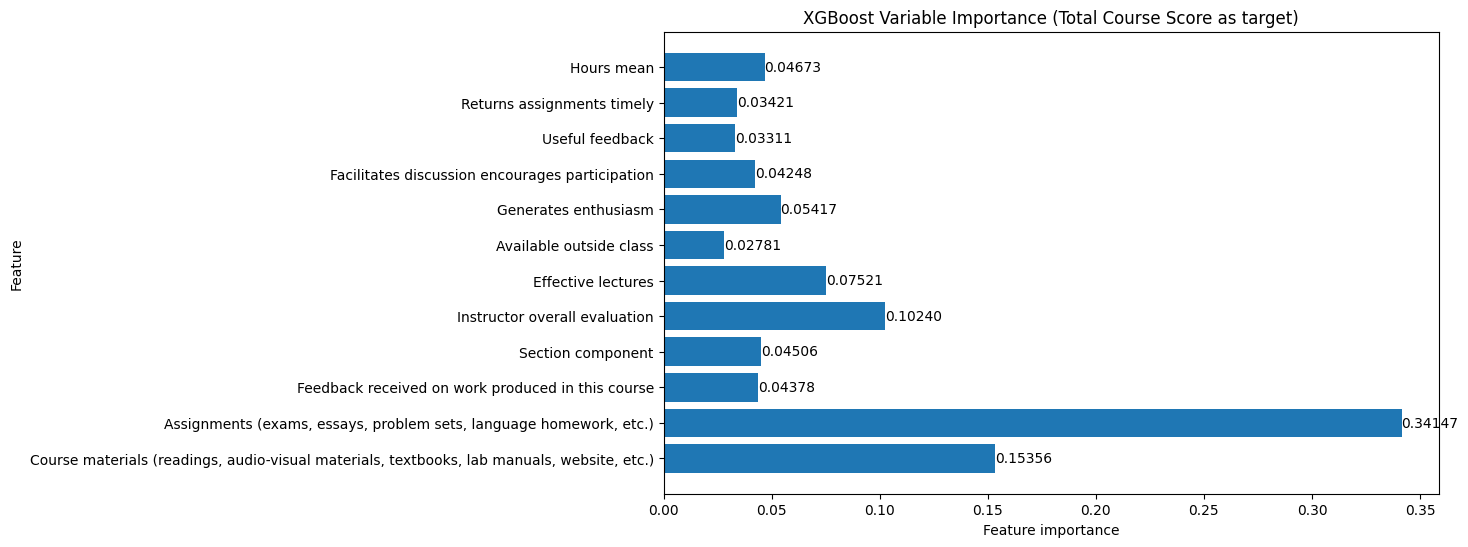

In [124]:
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

# Train an XGBoost regressor
regressor = XGBRegressor(random_state=1010101)
regressor.fit(X_train, y_train)

# Plot feature importances
plt.figure(figsize=(10, 6))
n_features = X.shape[1]
bars = plt.barh(range(n_features), regressor.feature_importances_, align='center')
plt.yticks(np.arange(n_features), ['Course materials (readings, audio-visual materials, textbooks, lab manuals, website, etc.)',
                                   'Assignments (exams, essays, problem sets, language homework, etc.)',
                                   'Feedback received on work produced in this course',
                                   'Section component',
                                   'Instructor overall evaluation',
                                   'Effective lectures',
                                   'Available outside class',
                                   'Generates enthusiasm',
                                   'Facilitates discussion encourages participation',
                                   'Useful feedback',
                                   'Returns assignments timely',
                                   'Hours mean',]
                                   [:n_features])
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.title('XGBoost Variable Importance (Total Course Score as target)')

# Add text annotations
for bar, importance in zip(bars, regressor.feature_importances_):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{importance:.5f}', va='center')

plt.show()


Constant features: []


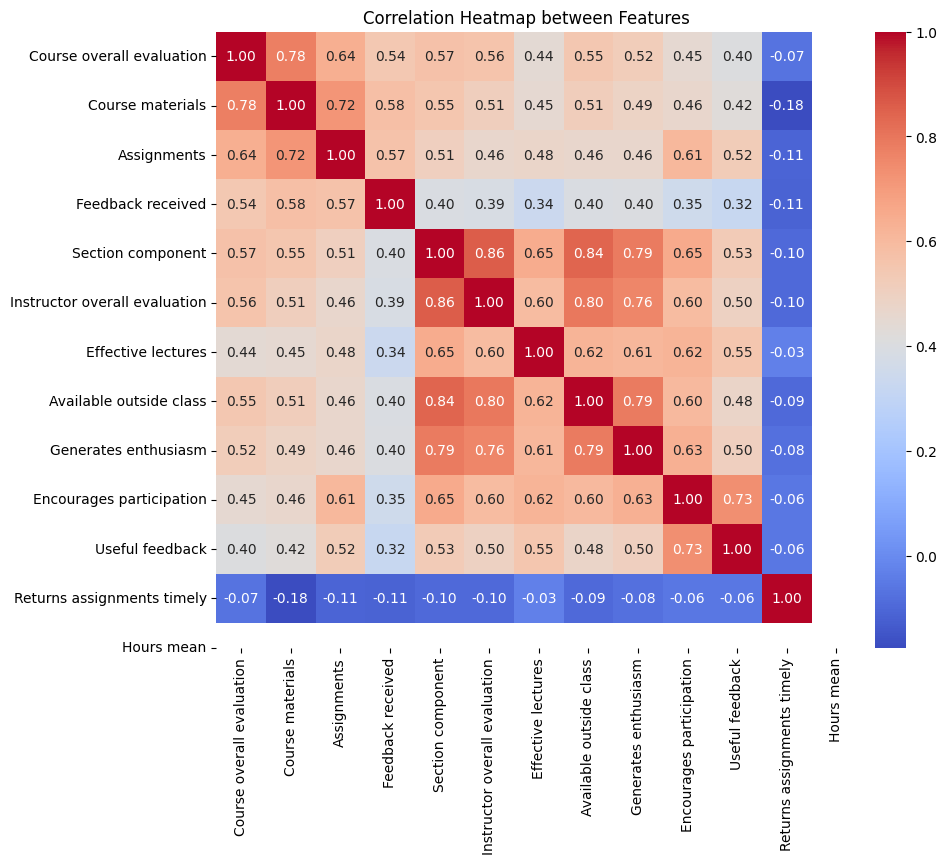

In [125]:
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Handling missing values
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Check for constant features
constant_features = np.all(X_imputed == X_imputed[0,:], axis=0)
print("Constant features:", np.where(constant_features)[0])

# Create correlation matrix
corr = np.corrcoef(X_imputed, rowvar=False)

# Plot heatmap
plt.figure(figsize=(10, 8))

feature_labels = [
    'Course overall evaluation',
    'Course materials',
    'Assignments',
    'Feedback received',
    'Section component',
    'Instructor overall evaluation',
    'Effective lectures',
    'Available outside class',
    'Generates enthusiasm',
    'Encourages participation',
    'Useful feedback',
    'Returns assignments timely',
    'Hours mean'
]

sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    xticklabels=feature_labels,
    yticklabels=feature_labels
)

plt.title('Correlation Heatmap between Features')
plt.show()


{'Course materials': 0.353490823481752, 'Assignments': 0.35065345355641053, 'Feedback received': 0.11109505864966186, 'Section component': 0.08093802847784275, 'Instructor overall evaluation': 0.1446710286229375, 'Effective lectures': 0.032849144927033225, 'Available outside class': -0.04842142587693926, 'Generates enthusiasm': 0.0666195199432475, 'Encourages participation': 0.05744444852092814, 'Useful feedback': -0.03646799685529827, 'Returns assignments timely': -0.013480414572632096, 'Hours mean': 0.0061752904513761265}


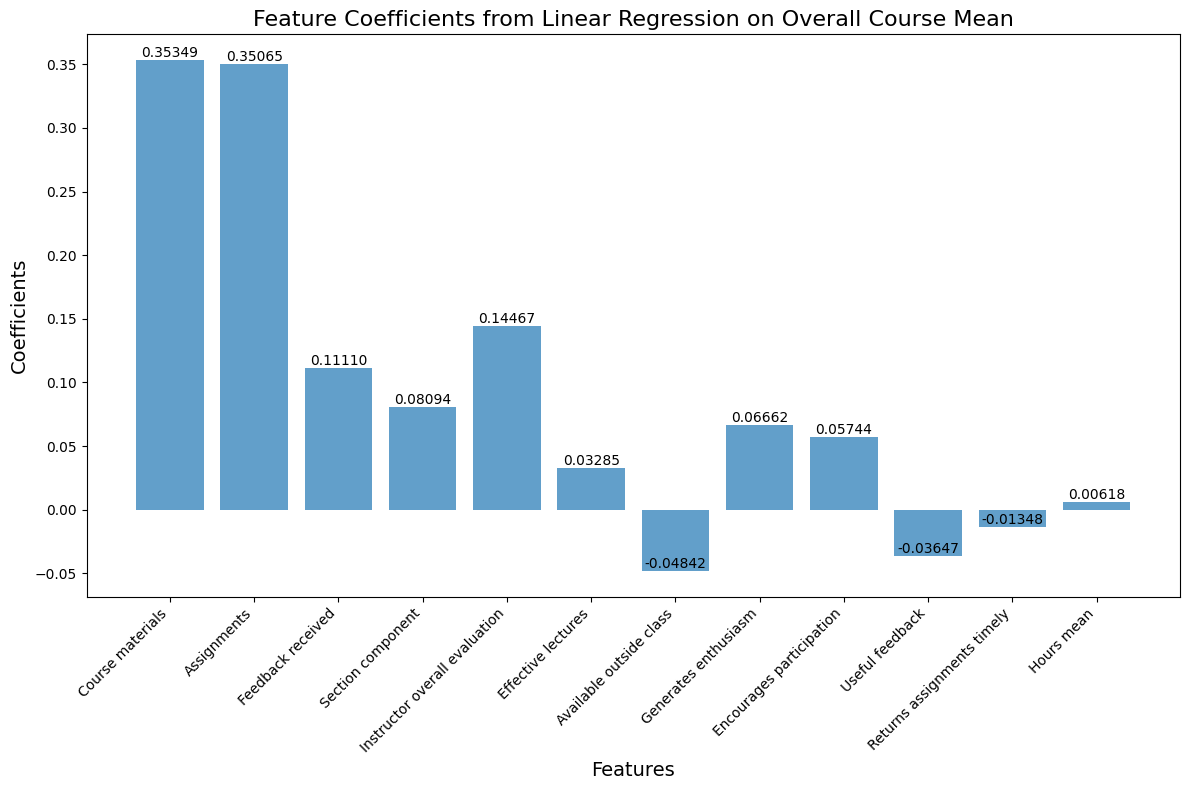

In [104]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

y = X_imputed[:, 0]   # 'Course overall evaluation'
X = X_imputed[:, 1:]  # All features except 'Course overall evaluation'

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Print the feature coefficients
coef_dict = {feature: coef for feature, coef in zip(feature_labels[1:], model.coef_)}
print(coef_dict)

# Plot feature coefficients
plt.figure(figsize=(12, 8))
plt.bar(range(len(coef_dict)), list(coef_dict.values()), align='center', alpha=0.7)
plt.xticks(range(len(coef_dict)), list(coef_dict.keys()), rotation=45, ha='right')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Coefficients', fontsize=14)
plt.title('Feature Coefficients from Linear Regression on Overall Course Mean', fontsize=16)

# Add value labels to each bar
for i, coef in enumerate(list(coef_dict.values())):
    plt.text(i, coef, f"{coef:.5f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

{'Course materials': 0.23570703034562362, 'Assignments': 0.5795888027510921, 'Feedback received': 0.027156665847934698, 'Section component': 0.02176619661139211, 'Instructor overall evaluation': 0.05793831360011875, 'Effective lectures': 0.012424944318165335, 'Available outside class': 0.007967464171589255, 'Generates enthusiasm': 0.011362769453392638, 'Encourages participation': 0.010500230371293183, 'Useful feedback': 0.00793658365828242, 'Returns assignments timely': 0.007253614463262586, 'Hours mean': 0.020397384407853304}


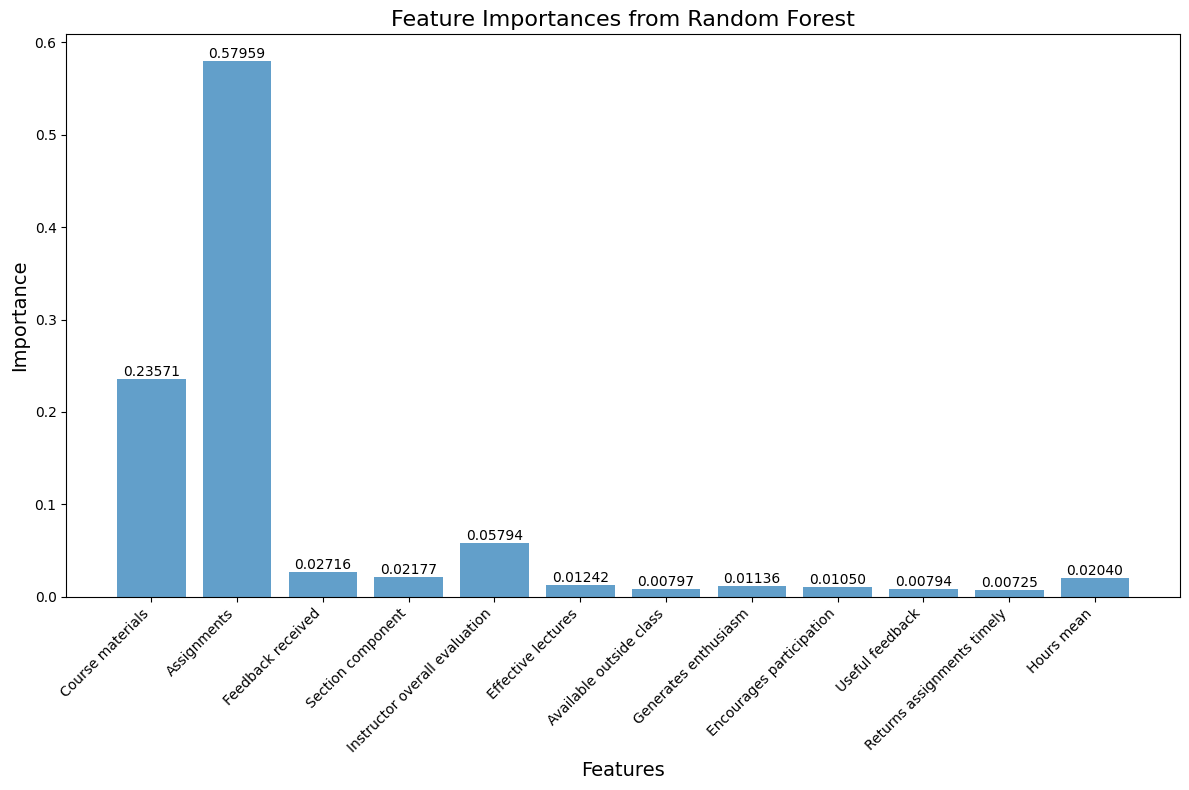

In [106]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Fit a Random Forest regressor
rf = RandomForestRegressor()
rf.fit(X, y)

# Print the feature importances
importances = {feature: importance for feature, importance in zip(feature_labels[1:], rf.feature_importances_)}
print(importances)

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.bar(range(len(importances)), list(importances.values()), align='center', alpha=0.7)
plt.xticks(range(len(importances)), list(importances.keys()), rotation=45, ha='right')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.title('Feature Importances from Random Forest on Overall Course Eval', fontsize=16)

# Add value labels to each bar
for i, importance in enumerate(list(importances.values())):
    plt.text(i, importance, f"{importance:.5f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

{'Course materials': 0.20760097, 'Assignments': 0.5496227, 'Feedback received': 0.023282522, 'Section component': 0.027401118, 'Instructor overall evaluation': 0.08368726, 'Effective lectures': 0.01905054, 'Available outside class': 0.010864471, 'Generates enthusiasm': 0.022415916, 'Encourages participation': 0.017700763, 'Useful feedback': 0.01067701, 'Returns assignments timely': 0.009972923, 'Hours mean': 0.017723778}


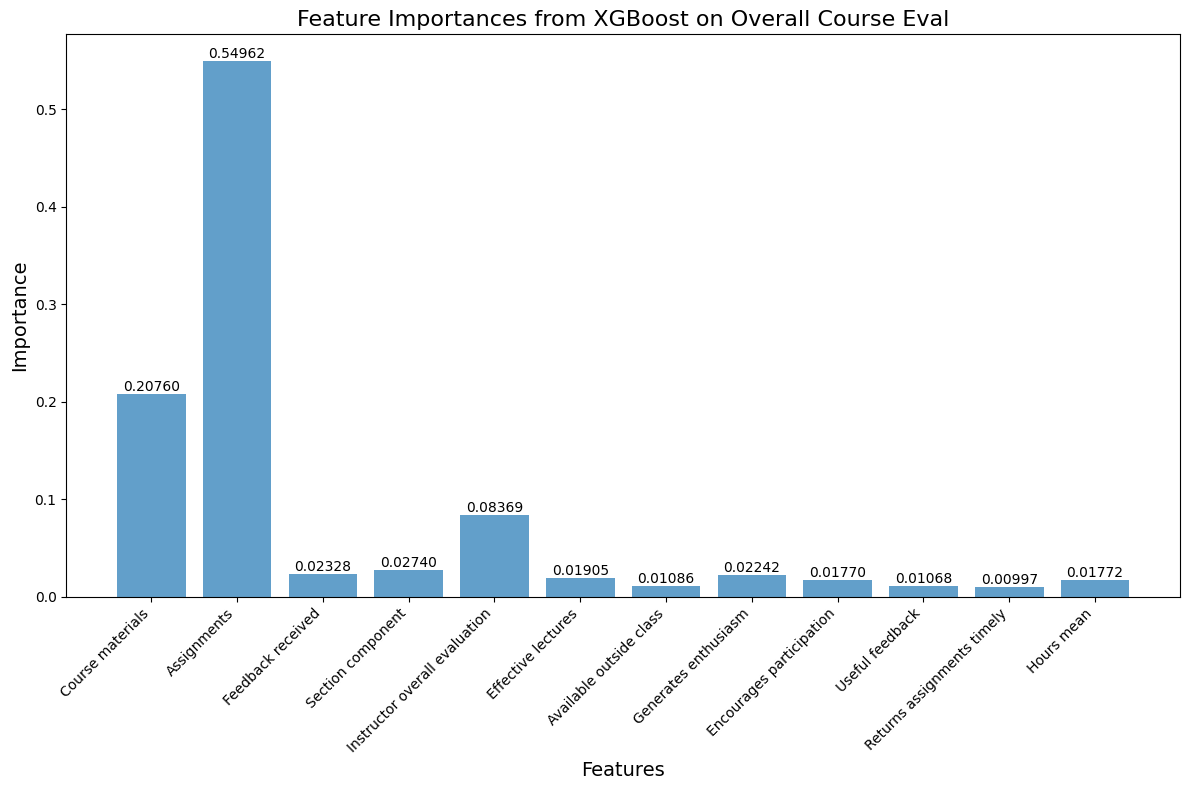

In [112]:
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

# Train an XGBoost regressor
rf = XGBRegressor(random_state=1010101)
rf.fit(X, y)

# Print the feature importances
importances = {feature: importance for feature, importance in zip(feature_labels[1:], rf.feature_importances_)}
print(importances)

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.bar(range(len(importances)), list(importances.values()), align='center', alpha=0.7)
plt.xticks(range(len(importances)), list(importances.keys()), rotation=45, ha='right')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.title('Feature Importances from XGBoost on Overall Course Eval', fontsize=16)

# Add value labels to each bar
for i, importance in enumerate(list(importances.values())):
    plt.text(i, importance, f"{importance:.5f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()